>  Burak ERÇIKTI - 20180808082
>>  SCIENTIFIC PROGRAMMING - EXERCISES 03
>>>  FILE I/O & CLASSES

# FILE I/O

**Exercise 7.1: Open a file**

In [ ]:
# Write a function that opens a file (input: filename), and prints the file line by line.
def open_file(filename):
    # When the file is finished, the file is closed automatically with().
    # I use the open() function to open and read the file.
    # I used 'r' to open a file in read mode.
    with open(filename, 'r') as file:
        for line in file:
            print(line)
  
open_file('lorem.txt')

**Exercise 7.2: Wordcount**

In [ ]:
# Question (a)

from operator import itemgetter

def common_words(filename):
    # Get the set of common words.
    list = []
    mydict = {}
    with open(filename, 'r') as file:
        for line in file:
            # The strip() function removes the leading and trailing white spaces
            # from the string and returns the same string without the white spaces.
            # Then I add it to the list I created.
            list.append(line.strip('\r\n'))
    for line in list:
        # split() func returns a list of all the words in the string
        words = line.split()
        for common_word in words:
            # Count the number of occurrences of each element in a given list.
            # To make a dictionary where keys are elements and values are the number of occurrences.
            mydict[common_word] = mydict.get(common_word, 0) + 1
    # Words are sorted in descending order of the number of words they have.
    # The "key= " parameter of sort requires a key function rather than a single key-value.
    # itemgetter(1) means a function that grabs the first item from a list-like object.
    sorted_dict = sorted(mydict.items(), key = itemgetter(1))
    for tupl in sorted_dict[-20:]:
        # Top 20 words printed
        print(tupl[0])
    
common_words('shakespeare.txt')

In [3]:
# Question (b)

def unique_words(filename):
    # Sets (sets) are non-ordered and non-indexable collection types.
    # There is no duplicate feature.
    # I created set() function with name word_set
    word_set = set()
    with open(filename, 'r') as file:
        for line in file:
            # split() func returns a list of all the words in the string
            for word in line.split():
                word_set.add(word)      
    print(len(word_set))

unique_words('shakespeare.txt')

In [4]:
# Question (c)

from operator import itemgetter

def at_least_5(filename):
    list = []
    mydict = {}
    count = 0
    with open(filename, 'r') as file:
        for line in file:
            # The strip() function removes the leading and trailing white spaces
            # from the string and returns the same string without the white spaces.
            # Then I add it to the list I created.
            list.append(line.strip('\r\n '))
    for line in list:
        # split() func returns a list of all the words in the string
        words = line.split()
        for unique_words in words:
            # Count the number of occurrences of each element in a given list.
            # To make a dictionary where keys are elements and values are the number of occurrences.
            mydict[unique_words] = mydict.get(unique_words, 0) + 1
    # Words are sorted in descending order of the number of words they have.
    # The "key= " parameter of sort requires a key function rather than a single key-value.
    # itemgetter(1) means a function that grabs the first item from a list-like object.
    sorted_dict = sorted(mydict.items(), key = itemgetter(1))
    for tupl in sorted_dict:
        if tupl[1] < 5:
            pass
        count += 1
    print("How many words are used at least 5 times? " + str(count))
    
at_least_5('shakespeare.txt')

In [ ]:
# Question (d)

import operator

arr = []
dict = {}
count = 0
with open('shakespeare.txt', 'r') as file:
    for line in file:
        arr.append(line.strip('\r\n '))
for line in arr:
    words = line.split()
    for word in words:
        dict[word] = dict.get(word, 0) + 1
sorted_dict = sorted(dict.items(), key = operator.itemgetter(1))
   
with open('top200common.txt', 'w') as f:
    # Top 200 written to file
    for tup in sorted_dict[-200:]:
        f.write(str(tup[0]) + ' ' + str(tup[1]) + '\n')

**Exercise 7.3: Random text generator II**

In [ ]:
import random

def process_line(line):
    word_list = []
    _words = line.split(" ")
    # Begın → the → fire → and → the → wind. → END
    # [('BEGIN', 'in')]
    _words.insert(0, 'BEGIN')
    #('night', 'END')]
    _words.append('END')

    len_words = len(_words) - 1
    for i in range(len_words):
        word_list.append((_words[i], _words[i + 1]))
    return word_list


def process_textfile(filename):
    mydict = {}
    
    with open(filename) as f:
        content = f.readlines()
    # .strip() removes leading and trailing spaces from string
    content = [x.strip() for x in content]
    for line in content:
        if len(line) >= 1:
            x = process_line(line)
        for i in x:
            if i[0] not in mydict:
                mydict[i[0]] = [i[1]]
            else:
                mydict[i[0]].append(i[1])
    return mydict

**Exercise 7.4: Sum of lists**

In [2]:
# Question (a)

import random

def data_generation(n, a, b, filename):
    with open(filename, 'w') as file:
        for x in range(n):
            file.write(str(random.randint(a, b)) + '\n')
        return ''
            
print(data_generation(10, 1, 15, 'data_generation.txt'))

In [3]:
# Question (b)

def read_data(filename):
    list = []
    with open(filename, 'r') as file:
        for line in file:
            list.append(int(line))
    return list

print(read_data('data_generation.txt'))

In [ ]:
# Question (c)

import random

def data_generation(n, a, b, filename):
    with open(filename, 'w') as file:
        for x in range(n):
            file.write(str(random.randint(a, b)) + '\n')
        return ''
            
def read_data(filename):
    list = []
    with open(filename, 'r') as file:
        for line in file:
            list.append(int(line))
    return list

def sum_problem(file_1, file_2, k):
    list_1 = read_data(file_1)
    list_2 = read_data(file_2)
    for u in list_1:        
        for v in list_2:
            # u + v = k
            if int(u) + int(v) == int(k):
                print("u:", str(u), "→ v:", str(v))

print('k values is 5000')
sum_problem("file_1.txt","file_2.txt", 5000)
print('k values is 12000')
sum_problem("file_1.txt","file_2.txt", 12000)

In [5]:
# Question (d)

import random

def data_generation(n, a, b, filename):
    with open(filename, 'w') as file:
        for x in range(n):
            file.write(str(random.randint(a, b)) + '\n')
        return ''
            
def read_data(filename):
    list = []
    with open(filename, 'r') as file:
        for line in file:
            list.append(int(line))
    return list

def sum_problem(file_1, file_2, k):
    list_1 = read_data(file_1)
    list_2 = read_data(file_2)
    for u in list_1:        
        for v in list_2:
            # u + v = k
            if int(u) + int(v) == int(k):
                print("u:", str(u), "→ v:", str(v))

data_generation(2000, 1, 10000, 'file_1.txt')
data_generation(2000, 1, 10000, 'file_2.txt')
print('k values is 5000')
sum_problem("file_1.txt","file_2.txt", 5000)
print('k values is 12000')
sum_problem("file_1.txt","file_2.txt", 12000)

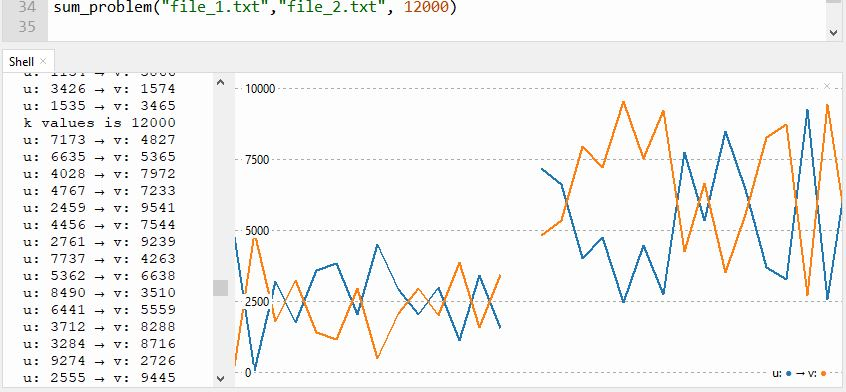

In [ ]:
# Question (e)

import random

def data_generation(n, a, b, filename):
    with open(filename, 'w') as file:
        for x in range(n):
            file.write(str(random.randint(a, b)) + '\n')
        return ''
            
def read_data(filename):
    list = []
    with open(filename, 'r') as file:
        for line in file:
            list.append(int(line))
    return list

def sum_problem(file_1, file_2, k):
    list_1 = read_data(file_1)
    list_2 = read_data(file_2)
    my_set = set()
    for u in list_1:
        my_set.add(u)
        
    for u in list_2:
        # u + v = k → k - u = v
        v = k - u
        if v in my_set:
            print("u:", str(u), "→ v:", str(v))

data_generation(2000, 1, 10000, 'file_1.txt')
data_generation(2000, 1, 10000, 'file_2.txt')
print('k values is 5000')
sum_problem("file_1.txt","file_2.txt", 5000)
print('k values is 12000')
sum_problem("file_1.txt","file_2.txt", 12000)

# CLASSES

**Exercise 8.1: Rational numbers**

In [5]:
# Question (a)

class Rational:
    # initialized by two integers, p and q.
    def __init__(self, p, q = 1):
        self.p = p 
        self.q = q   

In [12]:
# Question (b)

class Rational:
      def __init__(self, p, q = 1):
        self.p = p 
        self.q = q   
  
      def __repr__(self):
        return str(self.p) + '/' + str(self.q)

first = Rational(5,1)
print(first.__repr__())

5/1


In [13]:
# Question (c)

from fractions import Fraction
class Rational:
    def __init__(self, p, q = 1):
        self.p = p 
        self.q = q   
  
    def __repr__(self):
        return str(self.p) + '/' + str(self.q)

    def __simplifed__(self):
        return Fraction(self.p, self.q)
    
first = Rational(12,9)
print(first.__repr__())
print(first.__simplifed__())

12/9
4/3


In [14]:
# Question (d)

import math
from fractions import Fraction

class Rational:
    def __init__(self, p, q = 1):
        self.p = p 
        self.q = q   
  
    def __repr__(self):
        return str(self.p) + '/' + str(self.q)

    def __simplifed__(self):
        if self.q == 0:
            raise ValueError('the denominator cannot be zero')
        else:      
            return Fraction(self.p, self.q)
    
    def __add__(self, other):
        self.num_p = self.p + other.p
        self.num_q = math.gcd(self.q, other.q)

        num = math.gcd(self.num_p, self.num_q)

        result_p = self.num_p / num
        result_q = self.num_q / num

        if result_p == result_q:
            print(result_p)
        else:
            print(result_p, "/", result_q)

first = Rational(12, 2)
second = Rational(8, 2)

first.__add__(second)

10.0 / 1.0


In [15]:
# Question (e)

import math
from fractions import Fraction

class Rational:
    def __init__(self, p, q = 1):
        self.p = p 
        self.q = q   
  
    def __repr__(self):
        return str(self.p) + '/' + str(self.q)

    def __simplifed__(self):
        if self.q == 0:
            raise ValueError('the denominator cannot be zero')
        else:      
            return Fraction(self.p, self.q)

    def __sub__(self, other):
        self.num_p = self.p - other.p
        self.num_q = math.gcd(self.q, other.q)

        num = math.gcd(self.num_p, self.num_q)

        result_p = self.num_p / num
        result_q = self.num_q / num

        if result_p == result_q:
            print(result_p)
        else:
            print(result_p, "/", result_q)
            
first = Rational(12, 2)
second = Rational(2, 2)

first.__sub__(second)


5.0 / 1.0


In [16]:
# Question (f)

import math
from fractions import Fraction


class Rational:
    def __init__(self, p, q=1):
        self.p = p
        self.q = q

    def __repr__(self):
        return str(self.p) + '/' + str(self.q)

    def __simplifed__(self):
        if self.q == 0:
            raise ValueError('the denominator cannot be zero')
        else:
            return Fraction(self.p, self.q)

    def __mul__(self, other):
        self.num_p = self.p * other.p
        self.num_q = self.q * other.q

        num = math.gcd(self.num_p, self.num_q)

        result_p = self.num_p / num
        result_q = self.num_q / num

        if result_p == result_q:
            print(result_p)
        else:
            print(result_p, "/", result_q)


first = Rational(2, 5)
second = Rational(3, 4)

first.__mul__(second)

3.0 / 10.0


In [17]:
# Question (g)

import math
from fractions import Fraction


class Rational:
    def __init__(self, p, q=1):
        self.p = p
        self.q = q

    def __repr__(self):
        return str(self.p) + '/' + str(self.q)

    def __simplifed__(self):
        if self.q == 0:
            raise ValueError('the denominator cannot be zero')
        else:
            return Fraction(self.p, self.q)

    def __div__(self, other):
        self.num_p = self.p * other.q
        self.num_q = self.q * other.p

        num = math.gcd(self.num_p, self.num_q)

        result_p = self.num_p / num
        result_q = self.num_q / num

        if result_p == result_q:
            print(result_p)
        else:
            print(result_p, "/", result_q)

first = Rational(2, 5)
second = Rational(2, 4)

first.__div__(second)


4.0 / 5.0


In [18]:
# Question (h)

from fractions import Fraction

class Rational:
    def __init__(self, p, q=1):
        self.p = p
        self.q = q

    def __repr__(self):
        return str(self.p) + '/' + str(self.q)

    def __simplifed__(self):
        if self.q == 0:
            raise ValueError('the denominator cannot be zero')
        else:
            return Fraction(self.p, self.q)

    def __equ__(self, other):
        return self.p == other.p and self.q == other.q

first = Rational(2, 5)
second = Rational(3, 4)

print(first.__equ__(second))


False


In [19]:
# Question (i)

from fractions import Fraction


class Rational:
    def __init__(self, p, q=1):
        self.p = p
        self.q = q

    def __repr__(self):
        return str(self.p) + '/' + str(self.q)

    def __simplifed__(self):
        if self.q == 0:
            raise ValueError('the denominator cannot be zero')
        else:
            return Fraction(self.p, self.q)

    def __float__(self):
        return (self.p / self.q) * 1.0

first = Rational(3, 5)
second = Rational(5, 2)

print(first.__float__())
print(second.__float__())


0.6
2.5


In [20]:
# Question (j)

import math
from fractions import Fraction


class Rational:
    def __init__(self, p, q=1):
        self.p = p
        self.q = q

    def __repr__(self):
        return str(self.p) + '/' + str(self.q)

    def __simplifed__(self):
        if self.q == 0:
            raise ValueError('the denominator cannot be zero')
        else:
            return Fraction(self.p, self.q)

    # I created a method called __neg__ which converts our fractional expression from positive to negative.
    def __neg__(self):
        return Rational(-self.p, self.q)

first = Rational(3, 5)

print(first.__neg__())


-3/5


In [21]:
import math
from fractions import Fraction

class Rational:
    # Question (a)
    def __init__(self, p, q = 1):
        self.p = p
        self.q = q

    # Question (b)
    def __repr__(self):
        return str(self.p) + '/' + str(self.q)

    # Question (c)
    def __simplifed__(self):
        if self.q == 0:
            raise ValueError('the denominator cannot be zero')
        else:
            return Fraction(self.p, self.q)

    # Question (d)
    def __add__(self, other):
        self.num_p = self.p + other.p
        self.num_q = math.gcd(self.q, other.q)

        num = math.gcd(self.num_p, self.num_q)

        result_p = self.num_p / num
        result_q = self.num_q / num

        if result_p == result_q:
            print(result_p)
        else:
            print(result_p, "/", result_q)

    # Question (e)
    def __sub__(self, other):
        self.num_p = self.p - other.p
        self.num_q = math.gcd(self.q, other.q)

        num = math.gcd(self.num_p, self.num_q)

        result_p = self.num_p / num
        result_q = self.num_q / num

        if result_p == result_q:
            print(result_p)
        else:
            print(result_p, "/", result_q)

    # Question (f)
    def __mul__(self, other):
        self.num_p = self.p * other.p
        self.num_q = self.q * other.q

        num = math.gcd(self.num_p, self.num_q)

        result_p = self.num_p / num
        result_q = self.num_q / num

        if result_p == result_q:
            print(result_p)
        else:
            print(result_p, "/", result_q)

    # Question (g)
    def __div__(self, other):
        self.num_p = self.p * other.q
        self.num_q = self.q * other.p

        num = math.gcd(self.num_p, self.num_q)

        result_p = self.num_p / num
        result_q = self.num_q / num

        if result_p == result_q:
            print(result_p)
        else:
            print(result_p, "/", result_q)

    # Question (h)
    def __equ__(self, other):
        return self.p == other.p and self.q == other.q

    # Question (i)
    def __float__(self):
        return (self.p / self.q) * 1.0

    # Question (j)
    # I created a method called __neg__ which converts our fractional expression from positive to negative.
    def __neg__(self):
        return Rational(-self.p, self.q)

print("my fractions")
first = Rational(2, 4)
second = Rational(8, 4)

first_repr = first
second_repr = second

print(str(first) + "  |  " + str(second))
print("__repr__()")
print(first.__repr__())
print(second.__repr__())

print("adding fractions")
first.__add__(second)
print("subtract fractions")
first.__sub__(second)
print("multiply fractions")
first.__mul__(second)
print("divide fractions")
first.__div__(second)
print("is equal fractions")
print(first.__equ__(second))
print("convert the rational number to a floating point")
print(first, first.__float__())
print("convert the positive fractions to a negative")
print(first.__neg__())

my fractions
2/4  |  8/4
__repr__()
2/4
8/4
adding fractions
5.0 / 2.0
subtract fractions
-3.0 / 2.0
multiply fractions
1.0
divide fractions
1.0 / 4.0
is equal fractions
False
convert the rational number to a floating point
2/4 0.5
convert the positive fractions to a negative
-2/4


**Exercise 8.2: Rock Paper Scissors**

In [22]:
# Question (a)

In [23]:
# Question (b)

In [24]:
# Question (c)

**Exercise 8.3: Hangman agent**

**Exercise 8.4: Sparse and dense vectors**

**Exercise 8.5: Implementing the set class**

In [25]:
class mySet:
    def __init__(self):
        self.mydict = {}

    def __repr__(self):
        _str = '{'
        for e in self.mydict.keys():
            _str += str(e)
            _str += ','
        _str = _str[:-1]
        return _str + '}'

    def __add__(self, ele):
        self.mydict[ele] = 1

    def __len__(self):
        return len(self.mydict)

    def __is_subset__(self, other):
        _subset = set(self) <= set(other)
        return _subset

    def __is_superset__(self, other):
        _superset = set(self) >= set(other)
        return _superset

    def __iter__(self):
        return iter(self.mydict.keys())

    def __extends__(self, ele):
        return ele in self.mydict

    def __union__(self, other):
        for k in other:
            self.mydict[k] = 1

    def __clone__(self):
        copy_set = mySet()
        for k in self.mydict:
            copy_set.__add__(k)
        return copy_set

    def __intersect__(self, other):
        intersect = list(set(self) & set(other))
        return intersect

X = mySet()
X.__add__(9)
X.__add__('a')
X.__add__(4)
print("Set X")
print(X)

Y = mySet()
Y.__add__('a')
Y.__add__(2)
print("Set Y")
print(Y)

print("Copying elements from x to z ")
Z = X.__clone__()
print(Z)

print("Is x a subset of y?")
print(X.__is_subset__(Y))
print("Is x a superset of y?")
print(X.__is_superset__(Y))

X.__union__(Y)
print("Union sets x and y")
print(X)

print("Now, Is x a superset of y?")
print(X.__is_superset__(Y))

print("The intersection of the z and y sets.")
print(Z.__intersect__(Y))

print("is extend in set?")
print(X.__extends__(3))



Set X
{9,a,4}
Set Y
{a,2}
Copying elements from x to z 
{9,a,4}
Is x a subset of y?
False
Is x a superset of y?
False
Union sets x and y
{9,a,4,2}
Now, Is x a superset of y?
True
The intersection of the z and y sets.
['a']
is extend in set?
False


**Exercise 8.6: Binary search tree**

In [26]:
# Question (a)

class Node:
    
   def __init__(self, value):
      self.left = None
      self.right = None
      self.value = value

root = Node(4)
# To add a value to the tree manually, I assigned a value to the value object in the newly instantiated tree.
print(root.value)

4


In [27]:
# Question (b)

class Node:
    
   def __init__(self, value):
      self.left = None
      self.right = None
      self.value = value
      
   def __print_tree__(self):
       if self.left is not None:
           self.left.__print_tree__()
    
       print(self.value)
  
       if self.right is not None:
          self.right.__print_tree__()  

root = Node(2)
root.__print_tree__()

2


In [28]:
# Question (c)

class Node:
    # Question (a)            
    def __init__(self, value):
        self.left = None
        self.right = None
        self.value = value

    # Question (b)     
    def __print_tree__(self):
        print(self.value)

        if self.left is not None:
            self.left.__print_tree__()

        if self.right is not None:
            self.right.__print_tree__()


    # Question (c)
    # I am using a recursion.
    def __insert_node__(self, value):
        # Compare the new value with the parent node
        # The subtree to the left side of the root node will always be lesser than the root node
            if value < self.value:
                if self.left is None:
                    self.left = Node(value)
                else:
                    self.left.__insert_node__(value)
            # The subtree to the right side of the root node will always be greater than the root node.
            elif value > self.value:
                if self.right is None:
                    self.right = Node(value)
                else:
                    self.right.__insert_node__(value)


root = Node(11)
#       11
#      /  \
#     7   32
#        /
#       12

root.__insert_node__(32)
root.__insert_node__(7)
root.__insert_node__(12)

root.__print_tree__()

11
7
32
12


In [29]:
class Node:
    # Question (a)
    
    def __init__(self, value):
        self.left = None
        self.right = None
        self.value = value

    # Question (b) 
    
    def __print_tree__(self):
        print(self.value)

        if self.left is not None:
            self.left.__print_tree__()

        if self.right is not None:
            self.right.__print_tree__()


    # Question (c)
    
    # We are using a recursive algorithm, so we need to determine the base condition.
    # We meet the base condition when the root node is none.
    def __insert_node__(self, value):
            # Compare the new value with the parent node
            # The subtree to the left side of the root node will always be lesser than the root node
            if value < self.value:
                if self.left is None:
                    self.left = Node(value)
                self.left.__insert_node__(value)
            # The subtree to the right side of the root node will always be greater than the root node.
            if value > self.value:
                if self.right is None:
                    self.right = Node(value)
                self.right.__insert_node__(value)
    
    # Question (d)
    
    def __looks_up__(self, value):
            if value == self.value:
                return str(value) + " in the tree."
            # Compare the new value with the parent node
            if value < self.value:
                if self.left is None:
                    return str(value) + "not found in tree!"
                return self.left.__looks_up__(value)
            # The subtree to the right side of the root node will always be greater than the root node.
            if value > self.value:
                if self.right is None:
                    return str(value) + " not in the tree."
                return self.right.__looks_up__(value)

root = Node(11)
#       11
#      /  \
#     6   32
#        /
#       12

root.__insert_node__(32)
root.__insert_node__(6)
root.__insert_node__(12)

root.__print_tree__()
print(root.__looks_up__(33))
print(root.__looks_up__(6))

11
6
32
12
33 not in the tree.
6 in the tree.


In [30]:
# Question (e)

class Node:
    # Question (a)

    def __init__(self, value):
        self.left = None
        self.right = None
        self.value = value

    # Question (b)

    def __print_tree__(self):
        print(self.value)

        if self.left is not None:
            self.left.__print_tree__()

        if self.right is not None:
            self.right.__print_tree__()

    # Question (c)

    # We are using a recursive algorithm, so we need to determine the base condition.
    # We meet the base condition when the root node is none.
    def __insert_node__(self, value):
        # Compare the new value with the parent node
        # The subtree to the left side of the root node will always be lesser than the root node
        if value < self.value:
            if self.left is None:
                self.left = Node(value)
            self.left.__insert_node__(value)
        # The subtree to the right side of the root node will always be greater than the root node.
        if value > self.value:
            if self.right is None:
                self.right = Node(value)
            self.right.__insert_node__(value)

    # Question (d)

    def __looks_up__(self, value):
        if value == self.value:
            return str(value) + " in the tree."
        # Compare the new value with the parent node
        if value < self.value:
            if self.left is None:
                return str(value) + " not found in tree!"
            return self.left.__looks_up__(value)
        # The subtree to the right side of the root node will always be greater than the root node.
        if value > self.value:
            if self.right is None:
                return str(value) + " not in the tree."
            return self.right.__looks_up__(value)


    #Question (e)
    
    def __remove_node__(self, value):
        # The node to be removed is the leaf node, or,
        # The node to be removed has only one child, and,
        # The node to be removed has two children
        if self is None:
            return self
        if value < self.value:
            if self.left:
                self.left = self.left.__remove_node__(value)
            return self
        if value > self.value:
            if self.right:
                self.right = self.right.__remove_node__(value)
            return self
        if self.right is None:
            return self.left
        if self.left is None:
            return self.right
        min_value_node = self.right
        while min_value_node.left:
            min_value_node = min_value_node.left
        self.value = min_value_node.value
        self.right = self.right.__remove_node__(min_value_node.value)
        return self

root = Node(11)

root.__insert_node__(32)
root.__insert_node__(48)
root.__insert_node__(3)
root.__insert_node__(7)
root.__insert_node__(6)
root.__insert_node__(12)

root.__print_tree__()
print(root.__looks_up__(33))
print(root.__looks_up__(6))

root.__remove_node__(6)
root.__print_tree__()
print(root.__looks_up__(6))
root.__print_tree__()

11
3
7
6
32
12
48
33 not found in tree!
6 in the tree.
11
3
7
32
12
48
6 not found in tree!
11
3
7
32
12
48
